<h2>Advanced Programming Practical Assignment<h2>

<h2>By Edison Nkurunungi - JAN22/COMP/959U</h2>

In [1]:
%pip install seaborn

     |████████████████████████████████| 292 kB 4.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


<b>Import Libraries to be used</b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

In [3]:
# for test-train split and r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
# for linear regression:
from sklearn.linear_model import LinearRegression

In [5]:
# for cross validation and prediction
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [6]:
# for mean square error
from sklearn.metrics import mean_squared_error

In [7]:
# for saving trained models to disk:
import pickle

In [8]:
#import the file, WHO-COVID-19-global-data.csv and display dataset
df= pd.read_csv ('./Data/WHO-COVID-19-global-data.csv')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1/3/2020,AF,Afghanistan,EMRO,0,0,0,0
1,1/4/2020,AF,Afghanistan,EMRO,0,0,0,0
2,1/5/2020,AF,Afghanistan,EMRO,0,0,0,0
3,1/6/2020,AF,Afghanistan,EMRO,0,0,0,0
4,1/7/2020,AF,Afghanistan,EMRO,0,0,0,0


In [9]:
df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
197416,4/10/2022,ZW,Zimbabwe,AFRO,33,246958,0,5457
197417,4/11/2022,ZW,Zimbabwe,AFRO,15,246973,0,5457
197418,4/12/2022,ZW,Zimbabwe,AFRO,37,247010,3,5460
197419,4/13/2022,ZW,Zimbabwe,AFRO,84,247094,0,5460
197420,4/14/2022,ZW,Zimbabwe,AFRO,66,247160,0,5460


In [10]:
df.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

<b>Understanding the Linear relationship between two variables</b>

<p>In order to start understand the (linear) relationship between an individual variable and the Cumulative_deaths. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>

<b>Let's find the scatterplot of "Cumulative_cases" and "Cumulative_deaths"</b>

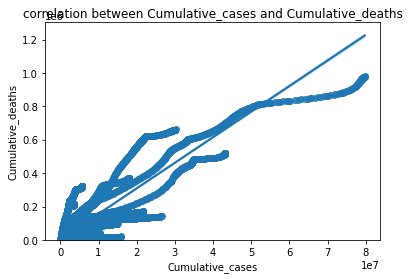

In [11]:
sns.regplot(x = 'Cumulative_cases', y = 'Cumulative_deaths', data = df)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between Cumulative_cases and Cumulative_deaths")
plt.show()

<p>There is a positive linear correlation between cumulative cases and cumulative deaths</p>

In [12]:
df[["Cumulative_cases", "Cumulative_deaths"]].corr()

,Cumulative_cases,Cumulative_deaths
Cumulative_cases,1.000000,0.914622
Cumulative_deaths,0.914622,1.000000


<p>As the Cumulative_cases goes up, the Cumulative_deaths goes up: this indicates a positive direct correlation between these two variables. Cumulative_cases seems like a pretty good predictor of Cumulative_deaths since the regression line is almost a perfect diagonal line.We can examine the correlation between Cumulative_cases and Cumulative_deaths and see it's approximately 0.91</p>

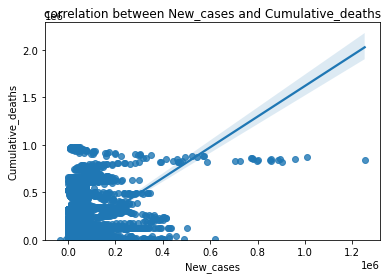

In [15]:
sns.regplot(x = 'New_cases', y = 'Cumulative_deaths', data = df)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between New_cases and Cumulative_deaths")
plt.show()

In [16]:
df[["New_cases", "Cumulative_deaths"]].corr()

,New_cases,Cumulative_deaths
New_cases,1.000000,0.503202
Cumulative_deaths,0.503202,1.000000


<p>As the New_cases goes up, the Cumulative_deaths goes up: this indicates a positive direct correlation between these two variables. New_cases seems like a good predictor of Cumulative_deaths since the regression line is almost a perfect diagonal line. We can examine the correlation between New_cases and Cumulative_deaths and see it's approximately 0.50</p>

<b>Let us focus on Cumulative_cases vs Cumulative_deaths which demonstrates a stronger positive high correlation</b>

<b>Let us perform simple linear regression by writing our simple linear models</b>

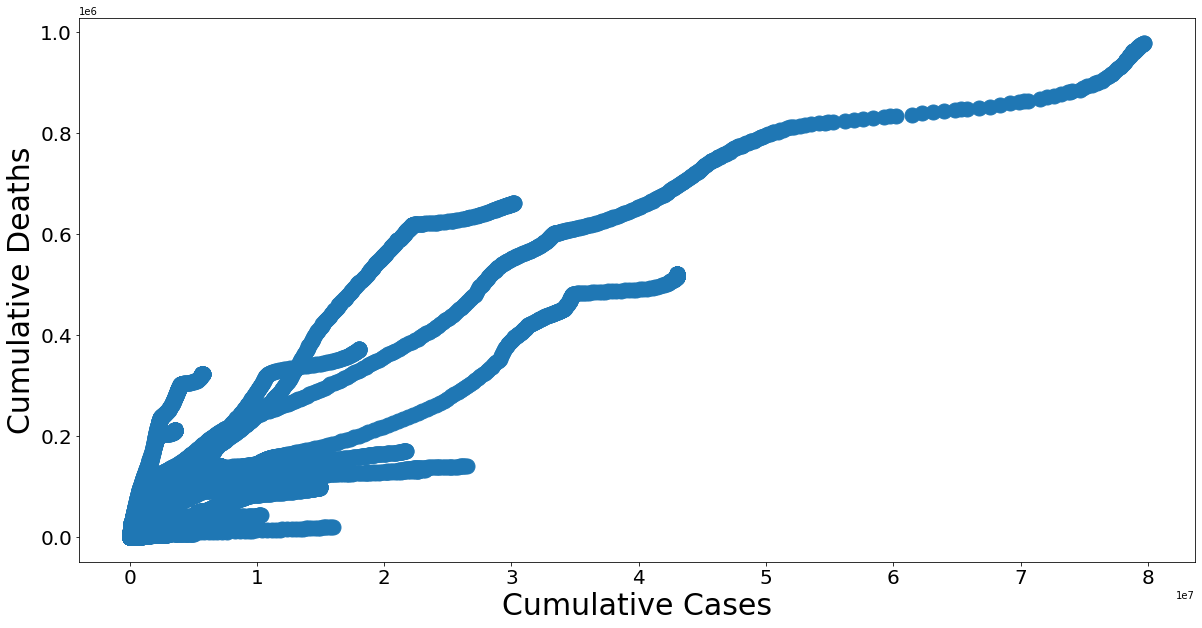

In [17]:
# dependent variable on y axis
y = df['Cumulative_deaths']

# independent variable on x axis
x = df['Cumulative_cases']


#Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Cumulative Deaths', fontsize = 30)
plt.xlabel('Cumulative Cases', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

<b>Determine the Slope and Y intercept</b>

<b>Create the linear regression object</b>

In [18]:
lm = LinearRegression()

<p>How could Cumulative_cases help us predict Cumulative_deaths: we create a linear function with "Cumulative_cases" as the predictor variable and the "Cumulative_deaths" as the response variable.</p>

In [19]:
X = df[['Cumulative_cases']]
Y = df['Cumulative_deaths']

<b>Fit the linear model using Cumulative_cases</b>

In [20]:
lm.fit(X,Y)

LinearRegression()

<b>Let us output a prediction</b>

In [21]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([2347.47528686, 2347.47528686, 2347.47528686, 2347.47528686,
       2347.47528686])

<p>The value of the intercept is:</p>

In [22]:
lm.intercept_

2347.4752868551277

<p>The value of the slope is:</p>

In [23]:
lm.coef_

array([0.01532318])

<p>The final estimated linear model is:</p>

<h2>Model structure: Yhat = a + bX</h2>

<h2>Cumulative_deaths = 2347 + 0.015*Cumulative_cases</h2>

<b>Calculating R-squared Value</b>

In [24]:
#Cumulative_cases_fit
X = df[['Cumulative_cases']]
Y = df['Cumulative_deaths']
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.8365335288617561


<p>We can say that ~ 83.65335% of the variation of the Cumulative_deaths is explained by this simple linear model Cumulative_cases_fit.</p>

<b>To calculate the MSE: we compare the predicted results with the actual results</b>

In [25]:
Yhat=lm.predict(X)
mse = mean_squared_error(df['Cumulative_deaths'], Yhat)
print('The mean square error of Cumulative_deaths and predicted value is: ', mse)

The mean square error of Cumulative_deaths and predicted value is:  470302482.92122144


<h2>Multiple Linear Regression</h2>

<b>From the previous section we know that another good predictor of price could be:New_cases</b>

<p>Let's develop a model by including this variable as a predictor variable</p>

<h2>Model format: Yhat = a + b1X1 + b2X2 + b3X3 + b4X4</h2>

In [26]:
lm3 = LinearRegression() # creating regression variable
Z = df[['New_cases', 'Cumulative_cases']] # extracting multiple independent variables

#Fit the linear model using the two above-mentioned variables.
lm3.fit(Z, df['Cumulative_deaths'])
print("What is the value of the intercept (a)? \n {}".format(lm3.intercept_))
print("What are the values of the coefficients (b1, b2)? \n {}".format(lm3.coef_))
print("\n Final estimated linear model")
print(f"\n Cumulative_deaths = {lm3.intercept_} + {lm3.coef_[0]}*New_cases + {lm3.coef_[1]}*Cumulative_cases")

What is the value of the intercept (a)? 
 2448.6527369410524
What are the values of the coefficients (b1, b2)? 
 [-0.13983976  0.01574856]

 Final estimated linear model

 Cumulative_deaths = 2448.6527369410524 + -0.13983975867975587*New_cases + 0.01574856336126515*Cumulative_cases


<h2> Calculating Pearson Correlation</h2>

In [27]:
from scipy.stats import pearsonr

In [28]:
# Convert dataframe into series
list1 = df['Cumulative_cases']
list2 = df['Cumulative_deaths']

In [30]:
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.915


<h2>Descriptive Statististics</h2>

In [33]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,1.974210e+05,1.974210e+05,197421.000000,197421.000000
mean,2.533603e+03,5.950420e+05,31.356082,11465.410286
std,1.674116e+04,3.201608e+06,165.130815,53638.347807
min,-3.295200e+04,0.000000e+00,-2460.000000,0.000000
25%,0.000000e+00,1.770000e+02,0.000000,2.000000
50%,2.500000e+01,1.088600e+04,0.000000,144.000000
75%,5.140000e+02,1.573110e+05,6.000000,2626.000000
max,1.252624e+06,7.971696e+07,11447.000000,979321.000000


<h2>Calculating F1 Score</h2>

In [34]:
from sklearn.metrics import f1_score